In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Data Science Course/healthcare-dataset-stroke-data.csv')


Mounted at /content/drive


In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Jumlah baris dan kolom: (5110, 12)

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

Jumlah nilai kosong:
id                     0
gender                 0
age                    0
hyper

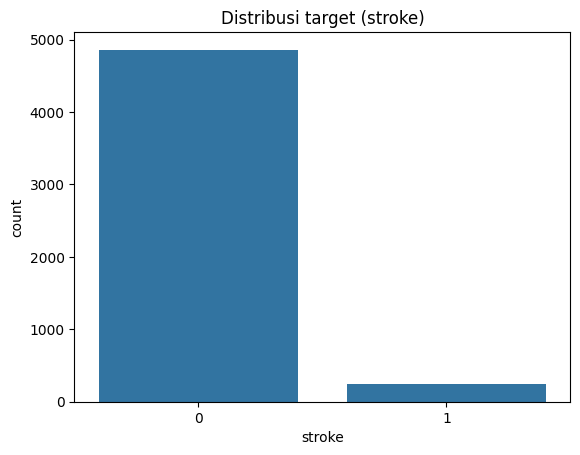

In [ ]:
print("Jumlah baris dan kolom:", df.shape)
print("\nInformasi Dataset:")
df.info()

print("\nJumlah nilai kosong:")
print(df.isnull().sum())

print("Distribusi target (stroke):")
print(df['stroke'].value_counts())
sns.countplot(x='stroke', data=df)
plt.title("Distribusi target (stroke)")
plt.show()

In [ ]:
df=df.drop(columns=['id'])


In [ ]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())


In [ ]:
le = LabelEncoder()
for col in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
  df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [ ]:
X = df.drop(columns=['stroke'])
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
    )

print("Jumlah data latih:", X_train.shape)
print("Jumlah data uji:", X_test.shape)

Jumlah data latih: (4088, 10)
Jumlah data uji: (1022, 10)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
    )

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Akurasi: 0.949119373776908

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



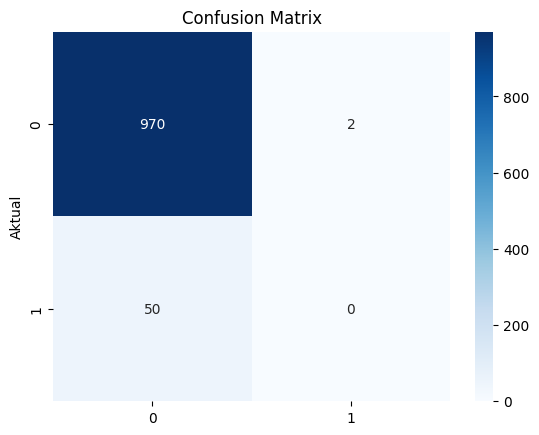

In [ ]:
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("Aktual")
plt.show()

In [ ]:
import joblib

joblib.dump(model, '/content/drive/MyDrive/Data Science Course/stroke_model.pkl')
joblib.dump(scaler, '/content/drive/MyDrive/Data Science Course/stroke_scaler.pkl')

print("Model dan scaler berhasil disimpan")

Model dan scaler berhasil disimpan


In [ ]:
df.to_csv('/content/drive/MyDrive/Data Science Course/ stroke.csv', index=False)
print("Dataset bersih telah disimpan sebagai stroke.csv")

Dataset bersih telah disimpan sebagai stroke.csv
